<a href="https://colab.research.google.com/github/schenita/info5731/blob/master/SFloyd_Self_Study_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Self Study 8 - Due March 26
# Schenita Floyd
# Grus: Chapter 1, 3, 4, 10

In [0]:
# Chapter 1 - Introduction

In [0]:
# Data Dump of users
users = [
        { "id": 0, "name": "Hero" },
        { "id": 1, "name": "Dunn" },
        { "id": 2, "name": "Sue" },
        { "id": 3, "name": "Chi" },
        { "id": 4, "name": "Thor" },
        { "id": 5, "name": "Clive" },
        { "id": 6, "name": "Hicks" },
        { "id": 7, "name": "Devin" },
        { "id": 8, "name": "Kate" },
        { "id": 9, "name": "Klein" }
]

In [0]:
# Friendship Data
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                   (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


In [0]:
# Creating an empty list for friends properties
for user in users: 
  user["friends"] = []

In [0]:
# Populating the list
for i, j in friendships:
  # this works because users[i] is the user whose id is i 
  users[i]["friends"].append(users[j]) # add i as a friend of j 
  users[j]["friends"].append(users[i]) # add j as a friend of i


In [0]:
#Finding the length 
def number_of_friends(user):
  """how many friends does _user_ have?""" 
  return len(user["friends"])

total_connections = sum(number_of_friends(user) 
                        for user in users)

In [0]:
# Dividing by the number of users
from __future__ import division
num_users = len(users)
avg_connections = total_connections / num_users

In [0]:
# create a list (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user)) 
                     for user in users]

In [11]:
sorted(num_friends_by_id,
  key=lambda (user_id, num_friends): 
       num_friends, reverse=True)

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [0]:
def friends_of_friend_ids_bad(user):
# "foaf" is short for "friend of a friend"
  return [foaf["id"]
    for friend in user["friends"] 
    for foaf in friend["friends"]]

In [18]:
print [friend["id"] for friend in users[0]["friends"]]

[1, 2]


In [19]:
print [friend["id"] for friend in users[1]["friends"]]

[0, 2, 3]


In [20]:
print [friend["id"] for friend in users[2]["friends"]] 

[0, 1, 3]


In [21]:
# Function to remove known friends
from collections import Counter # not loaded by default
def not_the_same(user, other_user):
  """two users are not the same if they have different ids""" 
  return user["id"] != other_user["id"]
def not_friends(user, other_user):
  """other_user is not a friend if he's not in user["friends"];
  that is, if he's not_the_same as all the people in user["friends"]""" 
  return all(not_the_same(friend, other_user)
    for friend in user["friends"])
def friends_of_friend_ids(user): 
  return Counter(foaf["id"]
    for friend in user["friends"] 
    for foaf in friend["friends"] 
    if not_the_same(user, foaf) 
    and not_friends(user, foaf))
print friends_of_friend_ids(users[3])

Counter({0: 2, 5: 1})


In [0]:
# Friends with similar interest

In [0]:
interests = [
        (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
        (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
        (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
        (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
        (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
        (3, "statistics"), (3, "regression"), (3, "probability"),
        (4, "machine learning"), (4, "regression"), (4, "decision trees"),
        (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
        (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
        (6, "probability"), (6, "mathematics"), (6, "theory"),
        (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
        (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
        (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
        (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [0]:
def data_scientists_who_like(target_interest): 
  return [user_id
    for user_id, user_interest in interests 
    if user_interest == target_interest]


In [0]:
from collections import defaultdict
user_ids_by_interest = defaultdict(list) 
for user_id, interest in interests:
  user_ids_by_interest[interest].append(user_id)

In [0]:
# keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)

In [0]:
for user_id, interest in interests: 
  interests_by_user_id[user_id].append(interest)

In [0]:
# Keep count of how many times we see each other user.
def most_common_interests_with(user): 
  return Counter(interested_user_id
  for interest in interests_by_user_id[user["id"]]
  for interested_user_id in user_ids_by_interest[interest] 
  if interested_user_id != user["id"])

In [0]:
# Salaries
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                            (48000, 0.7), (76000, 6),
                            (69000, 6.5), (76000, 7.5),
                            (60000, 2.5), (83000, 10),
                            (48000, 1.9), (63000, 4.2)]

In [0]:
salary_by_tenure = defaultdict(list)

In [0]:
for salary, tenure in salaries_and_tenures:
        salary_by_tenure[tenure].append(salary)

In [0]:
average_salary_by_tenure = {
  tenure : sum(salaries) / len(salaries)
  for tenure, salaries in salary_by_tenure.items()
}

In [42]:
average_salary_by_tenure

{0.7: 48000.0,
 1.9: 48000.0,
 2.5: 60000.0,
 4.2: 63000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 8.1: 88000.0,
 8.7: 83000.0,
 10: 83000.0}

In [0]:
def tenure_bucket(tenure): 
  if tenure < 2:
    return "less than two" 
  elif tenure < 5:
    return "between two and five" 
  else:
    return "more than five"

In [0]:
# keys are tenure buckets, values are lists of salaries for that bucket
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures: 
  bucket = tenure_bucket(tenure) 
  salary_by_tenure_bucket[bucket].append(salary)


In [0]:
# keys are tenure buckets, values are average salary for that bucket
average_salary_by_bucket = {
  tenure_bucket : sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.iteritems()
}

In [41]:
average_salary_by_bucket

{'between two and five': 61500.0,
 'less than two': 48000.0,
 'more than five': 79166.66666666667}

In [0]:
def predict_paid_or_unpaid(years_experience): 
  if years_experience < 3.0:
    return "paid"
  elif years_experience < 8.5:
    return "unpaid" 
  else:
    return "paid"


In [0]:
interests = [
        (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
        (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
        (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
        (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
        (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
        (3, "statistics"), (3, "regression"), (3, "probability"),
        (4, "machine learning"), (4, "regression"), (4, "decision trees"),
        (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
        (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
        (6, "probability"), (6, "mathematics"), (6, "theory"),
        (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
        (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
        (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
        (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]


In [0]:
words_and_counts = Counter(word
          for user, interest in interests
          for word in interest.lower().split())

In [47]:
for word, count in words_and_counts.most_common(): 
  if count > 1:
    print word, count

learning 3
java 3
python 3
big 3
data 3
hbase 2
regression 2
cassandra 2
statistics 2
probability 2
hadoop 2
networks 2
machine 2
neural 2
scikit-learn 2
r 2


In [0]:
# Chapter 3 - Visualizing Data

In [0]:
# MatPlotLib

In [0]:
from matplotlib import pyplot as plt
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

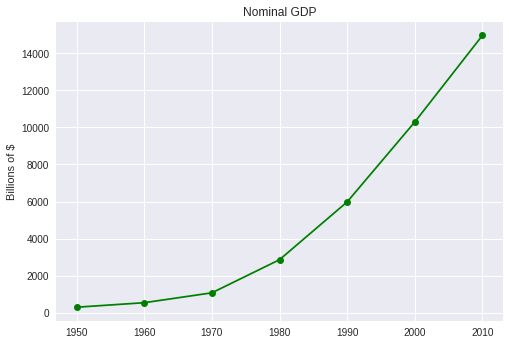

In [52]:
# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid') 
# add a title
plt.title("Nominal GDP")
# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()

In [0]:
# Bar CHarts

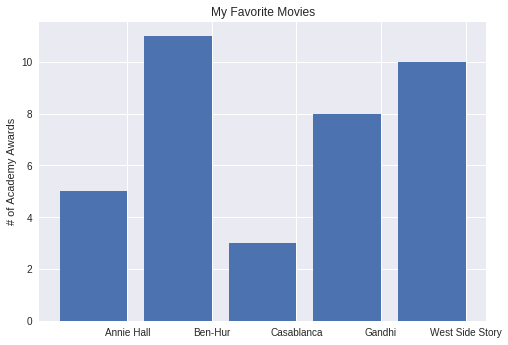

In [54]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# bars are by default width 0.8, so we'll add 0.1 to the left coordinates # so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(movies)]

# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, num_oscars)

plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")

# label x-axis with movie names at bar centers
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies) 
plt.show()

In [0]:
# Histogram

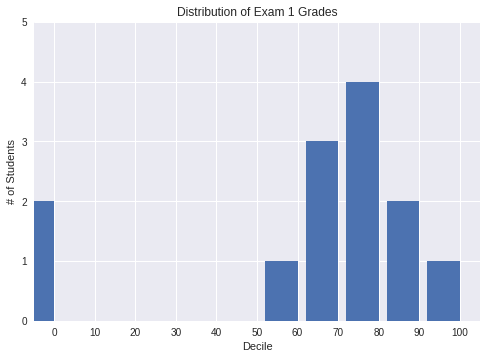

In [56]:
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0] 
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)
plt.bar([x - 4 for x in histogram.keys()],
        histogram.values(),
        8)

plt.axis([-5, 105, 0, 5])

plt.xticks([10 * i for i in range(11)]) 
plt.xlabel("Decile")
plt.ylabel("# of Students") 
plt.title("Distribution of Exam 1 Grades") 
plt.show()

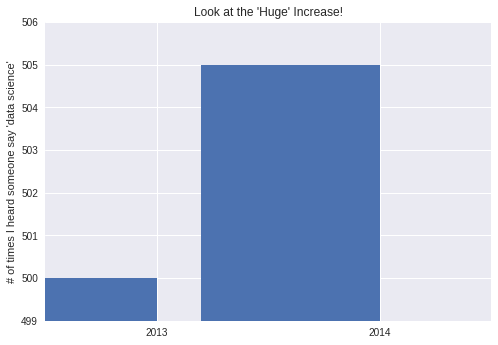

In [60]:
mentions = [500, 505]
years = [2013, 2014]
    
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
plt.ticklabel_format(useOffset=False)
plt.axis([2012.5,2014.5,499,506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

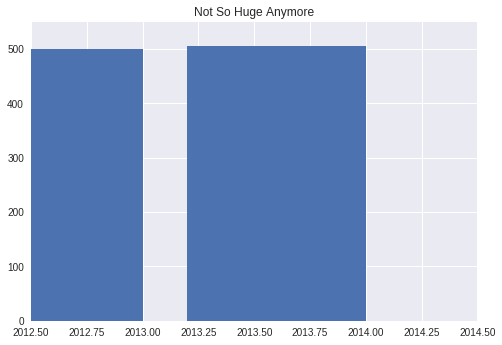

In [63]:
mentions = [500, 505]
years = [2013, 2014]
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.axis([2012.5,2014.5,0,550])
plt.title("Not So Huge Anymore")
plt.show()

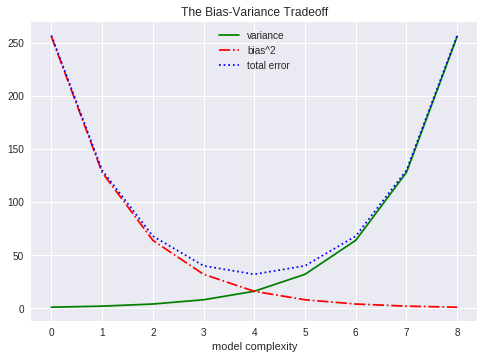

In [64]:
# Line Charts
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256] 
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)] 
xs = [i for i, _ in enumerate(variance)]
plt.plot(xs, variance, 'g-', label='variance') # green solid line 
plt.plot(xs, bias_squared, 'r-.', label='bias^2') # red dot-dashed line 
plt.plot(xs, total_error, 'b:', label='total error')
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

Text(0.5,1,'Daily Minutes vs. Number of Friends')

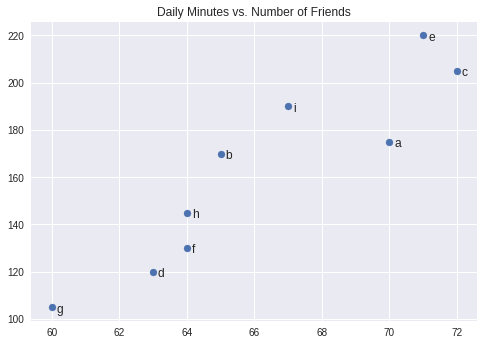

In [65]:
# Scatter Plots
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
plt.scatter(friends, minutes)

#  label each point
for label, friend_count, minute_count in zip(labels, friends, minutes): 
  plt.annotate(label,
               xy=(friend_count, minute_count), # put the label with its point 
               xytext=(5, -5), # but slightly offset 
               textcoords='offset points')
plt.title("Daily Minutes vs. Number of Friends")

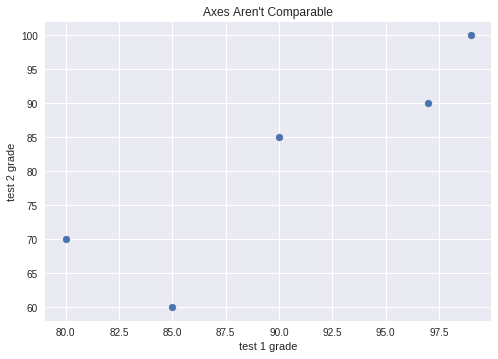

In [67]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

In [0]:
# Chapter 4 - Linear Algebra
# Vectors

In [0]:
height_weight_age = [70, # height,
                  170, # pounds,
                  40] #years

In [0]:
grades = [95, 
         80,
         75, 
         62]

In [0]:
def vector_add(v, w):
  """adds corresponding elements""" 
  return [v_i + w_i
    for v_i, w_i in zip(v, w)]

In [0]:
def vector_subtract(v, w):
  """subtracts corresponding elements""" 
  return [v_i - w_i
    for v_i, w_i in zip(v, w)]

In [0]:
def vector_sum(vectors):
  """sums all corresponding elements""" 
  result = vectors[0]
  for vector in vectors[1:]:
    result = vector_add(result, vector) 
  return result

In [0]:
def vector_sum(vectors):
  return reduce(vector_add, vectors)

In [0]:
def scalar_multiply(c, v):
  """c is a number, v is a vector""" 
  return [c * v_i for v_i in v]

In [0]:
def vector_mean(vectors):
  """compute the vector whose ith element is the mean of the ith elements of the input vectors"""
  n = len(vectors)
  return scalar_multiply(1/n, vector_sum(vectors))

In [0]:
def dot(v, w):
  """v_1 * w_1 + ... + v_n * w_n""" 
  return sum(v_i * w_i
    for v_i, w_i in zip(v, w))

In [0]:
def sum_of_squares(v):
  """v_1 * v_1 + ... + v_n * v_n""" 
  return dot(v, v)

In [0]:
import math

def magnitude(v):
  return math.sqrt(sum_of_squares(v))

In [0]:
# Distance of two squares

In [0]:
def squared_distance(v, w):
  """(v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2""" 
  return sum_of_squares(vector_subtract(v, w))
def distance(v, w):
  return math.sqrt(squared_distance(v, w))

In [0]:
def distance(v, w):
  return magnitude(vector_subtract(v, w))

In [0]:
# Matrices

In [0]:
A = [[1, 2, 3],
     [4, 5, 6]]

In [0]:
B = [[1, 2],
     [3, 4],
     [5, 6]]

In [0]:
def shape(A):
  num_rows = len(A)
  num_cols = len(A[0]) if A else 0 
  return num_rows, num_cols

In [0]:
def get_row(A, i): 
  return A[i]

In [0]:
def get_column(A, j): 
  return [A_i[j]
    for A_i in A]

In [0]:
def make_matrix(num_rows, num_cols, entry_fn):
  """returns a num_rows x num_cols matrix whose (i,j)th entry is entry_fn(i, j)"""
  return [[entry_fn(i, j)
           for j in range(num_cols)]
           for i in range(num_rows)]

In [0]:
def is_diagonal(i, j):
  """1's on the 'diagonal', 0's everywhere else""" 
  return 1 if i==j else 0

In [0]:
identity_matrix = make_matrix(5, 5, is_diagonal)


In [102]:
identity_matrix

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [0]:
data = [[70, 170, 40],
            [65, 120, 26],
            [77, 250, 19],]

In [0]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                   (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [0]:
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
              [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1 
              [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2 
               [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3 
               [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4 
               [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5 
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6 
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7 
               [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8 
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9

In [106]:
friendships[0][2] == 1

True

In [107]:
friendships[0][8] == 1

False

In [0]:
friends_of_five = [i # only need 
                   for i, is_friend in enumerate(friendships[5]) # to look at
                  if is_friend] # one row


In [0]:
# Chapter 10 - Working with Data

In [0]:
def bucketize(point, bucket_size):
  """floor the point to the next lower multiple of bucket_size""" 
  return bucket_size * math.floor(point / bucket_size)
def make_histogram(points, bucket_size):
  """buckets the points and counts how many in each bucket""" 
  return Counter(bucketize(point, bucket_size) for point in points)
def plot_histogram(points, bucket_size, title=""):
  histogram = make_histogram(points, bucket_size) 
  plt.bar(histogram.keys(), histogram.values(), width=bucket_size) 
  plt.title(title)
  plt.show()

In [0]:
import math, random
random.seed(0)

In [0]:
uniform = [200 * random.random() - 100 for _ in range(10000)]


In [0]:
normal = [57 * inverse_normal_cdf(random.random()) 
          for _ in range(10)]

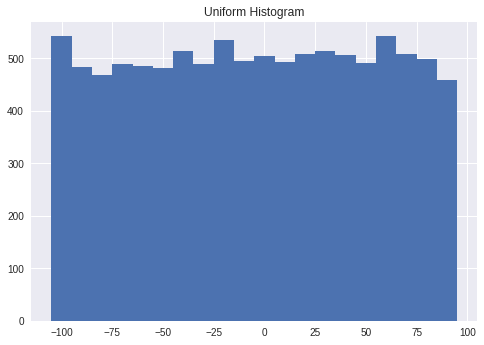

In [127]:
plot_histogram(uniform, 10, "Uniform Histogram")

In [0]:
def random_normal():
  return inverse_normal_cdf(random.random())

In [0]:
xs = [random_normal() for _ in range(1000)] 
ys1 = [x + random_normal() / 2 for x in xs] 
ys2 = [-x + random_normal() / 2 for x in xs]

In [0]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [0]:
import matplotlib.pyplot as plt

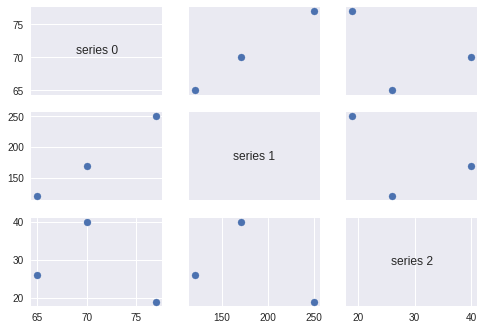

In [147]:
_, num_columns = shape(data)
fig, ax = plt.subplots(num_columns, num_columns) 
for i in range(num_columns):
  for j in range(num_columns):
    if i != j: ax[i][j].scatter(get_column(data, j), get_column(data, i))
    else: ax[i][j].annotate("series " + str(i), (0.5, 0.5), 
                            xycoords='axes fraction', 
                            ha="center", va="center")
    if i < num_columns - 1: ax[i][j].xaxis.set_visible(False) 
    if j > 0: ax[i][j].yaxis.set_visible(False)

ax[-1][-1].set_xlim(ax[0][-1].get_xlim()) 
ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.show()



In [0]:
closing_price = float(row[2])

In [0]:
def parse_row(input_row, parsers):
  return [parser(value) if parser is not None else value 
          for value, parser in zip(input_row, parsers)]

def parse_rows_with(reader, parsers):
  for row in reader:
    yield parse_row(row, parsers)


In [0]:
def try_or_none(f):
  def f_or_none(x):
    try: return f(x)
    except: return None 
  return f_or_none

In [0]:
def parse_row(input_row, parsers):
    return [try_or_none(parser)(value) if parser is not None else value
        for value, parser in zip(input_row, parsers)]

In [0]:
# importing data using a parser

In [156]:
import dateutil.parser 
data = []
with open("comma_delimited_stock_prices.csv", "rb") as f:
  reader = csv.reader(f)
  for line in parse_rows_with(reader, [dateutil.parser.parse, None, float]):
      data.append(line)

IOError: ignored

In [157]:
ls

sample_data/


In [0]:
for row in data:
  if any(x is None for x in row):
    print row

In [0]:
def try_parse_field(field_name, value, parser_dict):
  parser = parser_dict.get(field_name) 
  if parser is not None:
    return try_or_none(parser)(value) 
  else:
    return value

In [0]:
def parse_dict(input_dict, parser_dict):
  return { field_name : try_parse_field(field_name, value, parser_dict)
    for field_name, value in input_dict.iteritems() }

In [0]:
import datetime
data=[
  {'closing_price': 102.06,
  'date': datetime.datetime(2014, 8, 29, 0, 0),
  'symbol': 'AAPL'},]

In [0]:
max_aapl_price = max(row["closing_price"] 
                     for row in data
                     if row["symbol"] == "AAPL")

In [0]:
# group rows by symbol
by_symbol = defaultdict(list) 
for row in data:
        by_symbol[row["symbol"]].append(row)


In [0]:
# use a dict comprehension to find the max for each symbol
max_price_by_symbol = { symbol : max(row["closing_price"] 
                                     for row in grouped_rows)
                      for symbol, grouped_rows in by_symbol.iteritems() }


In [0]:
def picker(field_name):
  """returns a function that picks a field out of a dict""" 
  return lambda row: row[field_name]


In [0]:
def pluck(field_name, rows):
  """turn a list of dicts into the list of field_name values""" 
  return map(picker(field_name), rows)


In [0]:
def group_by(grouper, rows, value_transform=None):
  # key is output of grouper, value is list of rows 
  grouped = defaultdict(list)
  for row in rows:
    grouped[grouper(row)].append(row)

  if value_transform is None: 
    return grouped
  else:
    return { key : value_transform(rows)
      for key, rows in grouped.iteritems() }


In [0]:
max_price_by_symbol = group_by(picker("symbol"),
                                   data,
                                   lambda rows: max(pluck("closing_price", rows)))

In [0]:
def percent_price_change(yesterday, today):
  return today["closing_price"] / yesterday["closing_price"] - 1

In [0]:
def day_over_day_changes(grouped_rows):
  # sort the rows by date
  ordered = sorted(grouped_rows, key=picker("date"))


In [175]:
# zip with an offset to get pairs of consecutive days
return [{"symbol" : today["symbol"], "date" : today["date"],"change" : percent_price_change(yesterday, today)} 
        for yesterday, today in zip(ordered, ordered[1:])]

SyntaxError: ignored

In [0]:
changes_by_symbol = group_by(picker("symbol"), data, day_over_day_changes)


In [179]:
all_changes = [change for changes in changes_by_symbol.values() for change in changes]

TypeError: ignored

In [178]:
max(all_changes, key=picker("change"))

NameError: ignored

In [180]:
min(all_changes, key=picker("change"))

NameError: ignored

In [0]:
# Rescaling

In [0]:
a_to_b = distance([63, 150], [67, 160])
a_to_c = distance([63, 150], [70, 171])
b_to_c = distance([67, 160], [70, 171])

In [0]:
a_to_b = distance([160, 150], [170.2, 160]) 
a_to_c = distance([160, 150], [177.8, 171]) 
b_to_c = distance([170.2, 160], [177.8, 171])

In [0]:
def scale(data_matrix):
  """returns the means and standard deviations of each column""" 
  num_rows, num_cols = shape(data_matrix)
  means = [mean(get_column(data_matrix,j))
    for j in range(num_cols)]
  stdevs = [standard_deviation(get_column(data_matrix,j))
    for j in range(num_cols)] 
  return means, stdevs


In [0]:
def rescale(data_matrix):
  means, stdevs = scale(data_matrix)
  
  def rescaled(i, j): 
    if stdevs[j] > 0:
      return (data_matrix[i][j] - means[j]) / stdevs[j] 
    else:
      return data_matrix[i][j] 


In [0]:
num_rows, num_cols = shape(data_matrix)
return make_matrix(num_rows, num_cols, rescaled)

In [0]:
# Dimension Reduction

In [0]:
def de_mean_matrix(A):
  nr, nc = shape(A)
  column_means, _ = scale(A)
  return make_matrix(nr, nc, lambda i, j: A[i][j] - column_means[j])

In [0]:
def direction(w):
  mag = magnitude(w)
  return [w_i / mag for w_i in w]

In [0]:
def directional_variance_i(x_i, w):
  return dot(x_i, direction(w)) ** 2


In [0]:
def directional_variance(X, w):
  return sum(directional_variance_i(x_i, w)
    for x_i in X)

In [0]:
def directional_variance_gradient_i(x_i, w):
  projection_length = dot(x_i, direction(w))
  return [2 * projection_length * x_ij for x_ij in x_i]


In [0]:
def directional_variance_gradient(X, w):
  return vector_sum(directional_variance_gradient_i(x_i,w)
  for x_i in X)

In [0]:
def first_principal_component(X):
  guess = [1 for _ in X[0]] 
  unscaled_maximizer = maximize_batch(
    partial(directional_variance, X), # is now a function of w 
    partial(directional_variance_gradient, X), # is now a function of w 
    guess)
  return direction(unscaled_maximizer)

In [0]:
def first_principal_component_sgd(X):
  guess = [1 for _ in X[0]] 
  unscaled_maximizer = maximize_stochastic(
    lambda x, _, w: directional_variance_i(x, w),
    lambda x, _, w: directional_variance_gradient_i(x, w), 
    X,
    [None for _ in X], # the fake "y"
    guess)
  return direction(unscaled_maximizer)

In [0]:
def project(v, w):
  projection_length = dot(v, w)
  return scalar_multiply(projection_length, w)

In [0]:
def remove_projection(X, w):
  return [remove_projection_from_vector(x_i, w) for x_i in X]

In [0]:
def principal_component_analysis(X, num_components): 
  components = []
  for _ in range(num_components):
    component = first_principal_component(X) 
    components.append(component)
    X = remove_projection(X, component)

  return components

In [0]:
def transform_vector(v, components): 
  return [dot(v, w) for w in components]
def transform(X, components):
  return [transform_vector(x_i, components) for x_i in X]